In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
from common import *

Using Theano backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, 224, 224)))   # layer_0
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))                         # layer_5
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))                         # layer_10
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))   # layer_15
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))                         # layer_17
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))   # layer_20
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))   # layer_25
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))          # layer_30

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))                                  # layer_35
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


def getCategory(index):
    synset_path = "./"
    f = open(synset_path + "synset_words.txt", "r")
    for i, line in enumerate(f):
        if i == index:
            return line

1 n01443537 goldfish, Carassius auratus



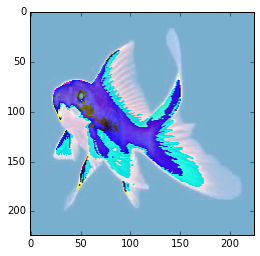

In [4]:
if True:
    im = cv2.resize(cv2.imread(data_set_root + 'goldfish.jpeg'), (224, 224)).astype(np.float32)
    im[:, :, 0] -= 103.939
    im[:, :, 1] -= 116.779
    im[:, :, 2] -= 123.68
    imgplot = plt.imshow(im)
    im = im.transpose((2, 0, 1))
    im = np.expand_dims(im, axis=0)

    # Test pre-trained model
    model = VGG_16(data_set_root + 'vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    index = np.argmax(out)
    print index, getCategory(index)

### Test the result of each layer

In [4]:
from keras import backend as K

In [24]:
output = dict()
output["image0"] = im
for layer_index in range(37):
    get_layer_output = K.function([model.layers[layer_index].input, K.learning_phase()], 
                                      [model.layers[layer_index].output])
    input_key = "image" + str(layer_index)
    output_key = "image" + str(layer_index + 1)
    output[output_key] = get_layer_output([output[input_key], 0])[0]

In [28]:
# save as matlab .mat file
import scipy.io as sio
sio.savemat(data_set_root + 'vgg_python_result.mat', output)